# Table of Contents
 <p><div class="lev1"><a href="#Unicycle-Model"><span class="toc-item-num">1&nbsp;&nbsp;</span>Unicycle Model</a></div><div class="lev1"><a href="#Kinematic-bicycle-Model"><span class="toc-item-num">2&nbsp;&nbsp;</span>Kinematic bicycle Model</a></div><div class="lev1"><a href="#Dynamic-bicycle-Model"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dynamic bicycle Model</a></div><div class="lev1"><a href="#Compare-Model"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compare Model</a></div><div class="lev1"><a href="#linealize-Dynamic-Bicycle-Model-memo"><span class="toc-item-num">5&nbsp;&nbsp;</span>linealize Dynamic Bicycle Model memo</a></div>

# Unicycle Model

非常にシンプルなモデル。
シンプルだが、速度ベクトルが車両の進行方向と同じなので少し無理がある

\begin{align}
x_{k+1} &= x_{k} + v_k cos(\phi_k)dt\\
y_{k+1} &= y_{k} + v_k sin(\phi_k)dt\\
\phi_{k+1} &= \phi_{k} + \frac{v_{k}}{L}tan(\delta_t)dt\\
v_{k+1} &= v_{k} + a_k dt \\
\end{align}


# Kinematic bicycle Model
Unicycle Modelと比べて、車両のすべり角は考慮しているが、車輪のすべり角は考慮していない。
速度が15km/h以下の時には有効らしい (Parking などでは有効らしい)

\begin{align}
x_{k+1} &= x_{k} + v_k cos(\phi_k+\beta_k)dt \\
y_{k+1} &= y_{k} + v_k sin(\phi_k+\beta_k)dt\\
\phi_{k+1} &= \phi_{k} + \frac{v_{k}}{L_r}sin(\beta_k)dt\\
v_{k+1} &= v_{k} + a_k dt\\
\beta_{k} &= tan^{-1}(\frac{L_r}{L_f+L_r}tan(\delta_{f,k}))
\end{align}



# Dynamic bicycle Model
高速で走行するモデルには基本的にこれをつかう
分母にv_xがあるため、速度が0の時に計算できなくなる。

\begin{align}
x_{k+1} &= x_{k} + v_{x,k} cos(\phi_k)dt - v_{y,k} sin(\phi_k)dt \\
y_{k+1} &= y_{k} + v_{x,k} sin(\phi_k)dt + v_{y,k} cos(\phi_k)dt\\
\phi_{k+1} &= \phi_{k} + \omega_k dt\\
F_{fy,k} &= -C_f( \frac{v_{y,k}+L_f\omega_k}{v_{x,k}}-\delta_t) \\
F_{ry,k} &= -C_r( \frac{v_{y,k}-L_r\omega_k}{v_{x,k}}) \\
v_{x,k+1} &= v_{x,k} + (a_k-\frac{F_{fy,k}sin(\delta_{k})}{m}+v_{y,k}\omega_k)dt\\
v_{y,k+1} &= v_{y,k} + (\frac{F_{ry,t}}{m}+\frac{F_{fy,k}cos(\delta_{k})}{m}-v_{x,k}\omega_k)dt\\
\omega_{k+1} &= \omega_{k} + \frac{dt}{I_z}(F_{fy,t}L_fcos(\delta_{t})-F_{ry,t}L_r)
\end{align}

# Compare Model

In [1]:
#%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import unicycle_model
import kinematic_bicycle_model
import dynamic_bicyccle_model
import math

T = 100
a = [1.0] * T
delta = [math.radians(1.0)] * T

ustate = unicycle_model.State()
kstate = kinematic_bicycle_model.State()
dstate = dynamic_bicyccle_model.State()

ux,uy,uyaw,uv, = [],[],[],[]
dx,dy,dyaw,dv, = [],[],[],[]
kx,ky,kyaw,kv, kbeta= [],[],[],[],[]
time = []
t = 0.0


for (ai, di) in zip(a, delta):
    t = t + unicycle_model.dt
    time.append(t)
 
    ustate = unicycle_model.update(ustate, ai, di)
    ux.append(ustate.x+kinematic_bicycle_model.Lr*math.cos(ustate.yaw))
    uy.append(ustate.y+kinematic_bicycle_model.Lr*math.sin(ustate.yaw))
    uyaw.append(ustate.yaw)
    uv.append(ustate.v)
    
    kstate = kinematic_bicycle_model.update(kstate, ai, di)
    kx.append(kstate.x)
    ky.append(kstate.y)
    kyaw.append(kstate.yaw)
    kv.append(kstate.v)
    kbeta.append(kstate.beta)
    
    dstate = dynamic_bicyccle_model.update(dstate, ai, di)
    dx.append(dstate.x)
    dy.append(dstate.y)
    dyaw.append(dstate.yaw)
 


0.0
6.0189879062819264e-05
0.00018056963718845778
0.0003611392743769156
0.0006018987906281927
0.0009028481859422891
0.0012639874603192047
0.0016853166137589396
0.0021668356462614937
0.002708544557826867
0.0033104433484550597
0.003972532018146071
0.004694810566899903
0.005477278994716553
0.006319937301596024
0.0072227854875383125
0.00818582355254342
0.009209051496611349
0.010292469319742096
0.011436077021935663
0.012639874603192047
0.013903862063511251
0.015228039402893275
0.01661240662133812
0.018056963718845784
0.019561710695416266
0.021126647551049565
0.022751774285745686
0.024437090899504625
0.026182597392326385
0.027988293764210963
0.02985418001515836
0.03178025614516858
0.03376652215424161
0.03581297804237747
0.03791962380957615
0.04008645945583764
0.042313484981161956
0.044600700385549086
0.04694810566899904
0.04935570083151181
0.0518234858730874
0.05435146079372581
0.05693962559342704
0.05958798027219109
0.062296524830017956
0.06506525926690765
0.06789418358286016
0.070783297777

In [2]:
%timeit dynamic_bicyccle_model.update(dstate,ai,di)

4.12 µs ± 39.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [3]:
dynamic_bicyccle_model?

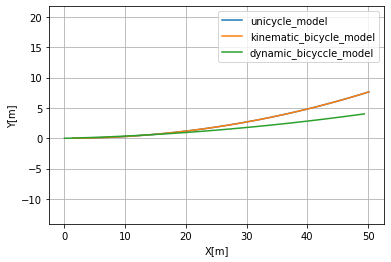

In [4]:
plt.plot(ux,uy,label="unicycle_model")
plt.plot(kx,ky,label="kinematic_bicycle_model")
plt.plot(dx,dy,label="dynamic_bicyccle_model")
plt.axis("equal")
plt.xlabel("X[m]")
plt.ylabel("Y[m]")
plt.legend()
plt.grid(True)
plt.show()

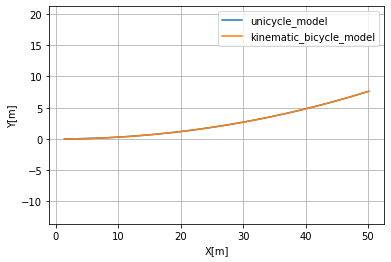

In [5]:
plt.plot(ux,uy,label="unicycle_model")
plt.plot(kx,ky,label="kinematic_bicycle_model")
plt.axis("equal")
plt.xlabel("X[m]")
plt.ylabel("Y[m]")
plt.legend()
plt.grid(True)
plt.show()

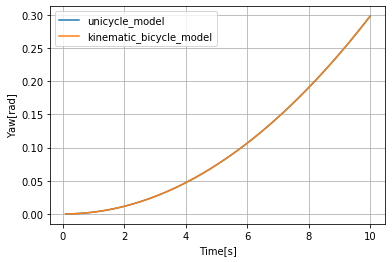

In [6]:
plt.plot(time, uyaw,label="unicycle_model")
plt.plot(time, kyaw,label="kinematic_bicycle_model")
plt.xlabel("Time[s]")
plt.ylabel("Yaw[rad]")
plt.legend()
plt.grid(True)
plt.show()

# linealize Dynamic Bicycle Model memo

In [35]:
%matplotlib inline

In [36]:
import sympy
from sympy import init_printing
init_printing()

x,y,vx, vy, phi, a, d, cf, cr, m, Lf, Lr, w,Iz = sympy.symbols('x y vx vy phi a d cf cr m Lf Lr, w, Iz')
f = vx*sympy.cos(phi) - vy*sympy.sin(phi)
f

In [10]:
sympy.diff(f,x)

In [11]:
sympy.diff(f,y)

In [12]:
sympy.diff(f,phi)

In [13]:
sympy.diff(f,vy)

In [14]:
sympy.diff(f,vx)

In [15]:
f2 = vx*sympy.sin(phi) - vy*sympy.cos(phi)
print(f2)

vx*sin(phi) - vy*cos(phi)


In [16]:
sympy.diff(f2,phi)

In [17]:
fvx = a + sympy.sin(d) * cf / m * ((vy+Lf*w)/vx - d) + vy*w
fvx

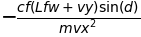

In [18]:
sympy.diff(fvx,vx)

In [19]:
sympy.diff(fvx,vy)

In [20]:
sympy.diff(fvx,w)

In [21]:
sympy.diff(fvx,x)

In [22]:
sympy.diff(fvx,d)

In [23]:
fvy = - cr / m * (vy-Lr*w)/vx + sympy.cos(d)/m*((vy+Lf*w)/vx - d) -vx*w
fvy

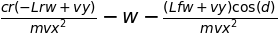

In [24]:
sympy.diff(fvy, vx)

In [25]:
sympy.diff(fvy, vy)

In [28]:
sympy.diff(fvy, w)

In [29]:
sympy.diff(fvy,d)

In [30]:
fw = -cf/Iz*((vy+Lf*w)/vx-d)*Lf*sympy.cos(d)+cr/Iz*(vy-Lr*w)/vx*Lr
fw

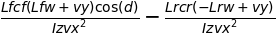

In [31]:
sympy.diff(fw,vx)

In [32]:
sympy.diff(fw,vy)

In [33]:
sympy.diff(fw,w)

In [34]:
sympy.diff(fw,d)